In [1]:
import numpy as np
import pandas as pd

In [2]:
from tensorflow.keras.datasets import fashion_mnist

In [3]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
import matplotlib.pyplot as plt

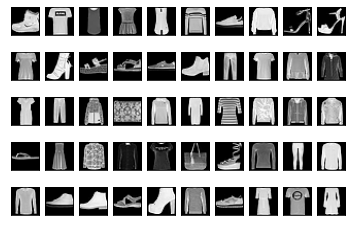

In [7]:
for digit_num in range(0,50):
    plt.subplot(5,10, digit_num+1)
    mat_data = X_train[digit_num].reshape(28,28)
    plt.imshow(mat_data, cmap='gray')
    plt.xticks([])
    plt.yticks([])

In [8]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [9]:
X_train = X_train/255
X_test = X_test/255

In [10]:
X_train = X_train.reshape(X_train.shape[0], 28*28)
X_test = X_test.reshape(X_test.shape[0], 28*28)

In [11]:
X_train.shape

(60000, 784)

In [12]:
X_train[0:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam, RMSprop, Adagrad

In [14]:
model = Sequential()

In [15]:
# First Hidden Layer
model.add(Dense(units=128, 
                activation='relu', 
                input_shape=(784,)))
model.add(BatchNormalization())

# Second Hidden Layer
model.add(Dense(units=64, 
                activation='tanh'))
# Third Hidden layer
model.add(Dense(units=32, 
                activation='relu'))

# Output Layer
model.add(Dense(units=10, 
                activation='softmax'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 111,658
Trainable params: 111,402
Non-trainable params: 256
________________________________________________

In [17]:
model.compile(optimizer=Adam(learning_rate=0.01), 
              loss=tensorflow.keras.losses.SparseCategoricalCrossentropy(), 
              metrics=['accuracy'])

In [18]:
result = model.fit(X_train, 
                   y_train,
                   #validation_data=(X_test,y_test),
                   epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5458 - accuracy: 0.8027
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4467 - accuracy: 0.8384
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4262 - accuracy: 0.8457
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4110 - accuracy: 0.8540
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4041 - accuracy: 0.8550
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4071 - accuracy: 0.8547
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4023 - accuracy: 0.8553
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4013 - accuracy: 0.8569
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3940 - accuracy: 0.8613
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.393

In [20]:
#model.get_weights()

In [21]:
model.predict(X_train)

array([[9.5964993e-11, 2.1890494e-09, 1.5916905e-10, ..., 4.0773540e-03,
        4.4827480e-06, 9.9567008e-01],
       [9.9757344e-01, 1.2304585e-05, 7.1755545e-05, ..., 3.6035632e-20,
        1.0592485e-09, 7.7684630e-11],
       [3.1110010e-01, 1.8167909e-02, 2.2686865e-02, ..., 8.7842352e-08,
        5.7321568e-03, 1.1577126e-05],
       ...,
       [3.2753139e-04, 1.9952564e-03, 3.7845944e-05, ..., 6.5783242e-14,
        2.5622090e-05, 4.2270276e-09],
       [9.8117632e-01, 4.4742592e-05, 2.0692158e-04, ..., 2.5969058e-15,
        1.6394503e-07, 3.6018493e-09],
       [3.8283918e-08, 4.2911694e-12, 3.9020072e-09, ..., 7.0022156e-06,
        8.3373192e-07, 7.7458026e-06]], dtype=float32)

In [22]:
y_train_pred = np.argmax(model.predict(X_train), axis=1)

In [23]:
y_test_pred = np.argmax(model.predict(X_test),axis=1)

In [24]:
y_train_pred

array([9, 0, 3, ..., 3, 0, 5])

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [26]:
print("Confusion Matrix")
print(confusion_matrix(y_pred = y_train_pred, y_true=y_train))
print("\n")
print(f" Accuracy {accuracy_score(y_pred = y_train_pred, y_true=y_train)}")

Confusion Matrix
[[5121    8   44  307   14    2  476    1   27    0]
 [  14 5759    4  200    6    1   15    0    1    0]
 [ 104    4 4380   99  892    0  509    3    9    0]
 [ 176   17   18 5467  190    1  126    0    5    0]
 [  13    7  320  246 5145    0  258    1   10    0]
 [   1    0    0    1    0 5830    2  132   15   19]
 [1027   10  400  243  654    0 3627    4   34    1]
 [   0    0    0    0    0  182    0 5661   10  147]
 [  18    0   10   24   23   22   90   29 5784    0]
 [   1    0    0    1    0  250    4  315    6 5423]]


 Accuracy 0.86995


In [27]:
print("Confusion Matrix")
print(confusion_matrix(y_pred = y_test_pred, y_true=y_test))
print("\n")
print(f" Accuracy {accuracy_score(y_pred = y_test_pred, y_true=y_test)}")

Confusion Matrix
[[827   3   4  64   6   1  88   0   7   0]
 [  5 950   3  32   3   0   5   1   1   0]
 [ 19   1 703  17 164   1  94   0   1   0]
 [ 26   8   5 901  32   0  25   0   3   0]
 [  0   0  71  40 832   0  50   1   6   0]
 [  0   0   0   0   0 952   1  36   2   9]
 [175   2  79  54 111   0 569   2   8   0]
 [  0   0   0   0   0  40   0 931   2  27]
 [  2   0   1   4   5   5  15   6 962   0]
 [  0   0   0   0   0  35   1  62   1 901]]


 Accuracy 0.8528


In [28]:
history = pd.DataFrame(result.history)

In [29]:
history.head()

,loss,accuracy
0,0.545754,0.802667
1,0.446723,0.838417
2,0.426239,0.845717
3,0.411012,0.854000
4,0.404114,0.854983


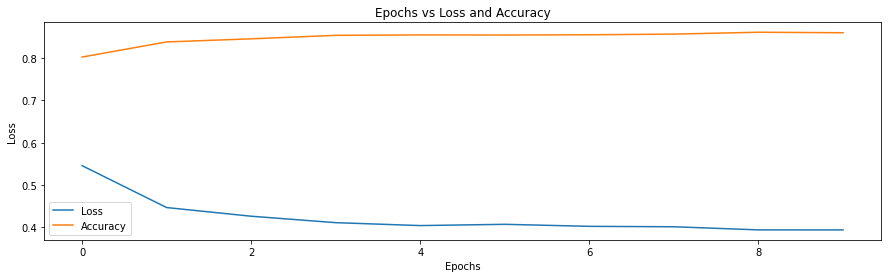

In [30]:
plt.figure(figsize = (15,4))
plt.plot(history.loss, label='Loss')
plt.plot(history.accuracy, label='Accuracy')
plt.title('Epochs vs Loss and Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()